In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
df=pd.read_csv('apy_1.csv')
df

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Bihar,NALANDA,1997,Rabi,Wheat,81934.00,160425.00
1,1,Assam,KARBI ANGLONG,2011,Whole Year,Onion,257.00,514.00
2,2,Gujarat,ANAND,2012,Summer,Maize,100.00,100.00
3,3,Karnataka,UTTAR KANNAD,2005,Rabi,Groundnut,2872.00,4572.00
4,4,Uttar Pradesh,JAUNPUR,2008,Rabi,Onion,110.00,1290.00
...,...,...,...,...,...,...,...,...
73822,73822,Bihar,BUXAR,2004,Whole Year,Onion,203.00,1918.00
73823,73823,Madhya Pradesh,RAJGARH,2013,Kharif,Bajra,12.00,11.00
73824,73824,Madhya Pradesh,RAJGARH,1998,Kharif,Groundnut,8700.00,9100.00
73825,73825,Rajasthan,TONK,2000,Kharif,Bajra,34477.00,20137.00


In [2]:
df.shape

(73827, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73827 entries, 0 to 73826
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     73827 non-null  int64  
 1   State_Name     73827 non-null  object 
 2   District_Name  73827 non-null  object 
 3   Crop_Year      73827 non-null  int64  
 4   Season         73827 non-null  object 
 5   Crop           73827 non-null  object 
 6   Area           73827 non-null  float64
 7   Production     72731 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [4]:
df.describe()

,Unnamed: 0,Crop_Year,Area,Production
count,73827.000000,73827.000000,7.382700e+04,7.273100e+04
mean,36913.000000,2005.657551,1.218297e+04,6.210320e+05
std,21312.163499,4.954910,5.348285e+04,1.749756e+07
min,0.000000,1997.000000,4.000000e-02,0.000000e+00
25%,18456.500000,2002.000000,8.100000e+01,8.900000e+01
50%,36913.000000,2006.000000,5.900000e+02,7.290000e+02
75%,55369.500000,2010.000000,4.500000e+03,7.200000e+03
max,73826.000000,2015.000000,8.580100e+06,1.125000e+09


In [5]:
df.isnull().sum()

Unnamed: 0          0
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       1096
dtype: int64

In [7]:
df=df.dropna(axis=0)

In [8]:
df

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Bihar,NALANDA,1997,Rabi,Wheat,81934.00,160425.00
1,1,Assam,KARBI ANGLONG,2011,Whole Year,Onion,257.00,514.00
2,2,Gujarat,ANAND,2012,Summer,Maize,100.00,100.00
3,3,Karnataka,UTTAR KANNAD,2005,Rabi,Groundnut,2872.00,4572.00
4,4,Uttar Pradesh,JAUNPUR,2008,Rabi,Onion,110.00,1290.00
...,...,...,...,...,...,...,...,...
73822,73822,Bihar,BUXAR,2004,Whole Year,Onion,203.00,1918.00
73823,73823,Madhya Pradesh,RAJGARH,2013,Kharif,Bajra,12.00,11.00
73824,73824,Madhya Pradesh,RAJGARH,1998,Kharif,Groundnut,8700.00,9100.00
73825,73825,Rajasthan,TONK,2000,Kharif,Bajra,34477.00,20137.00


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


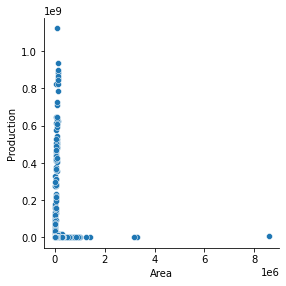

In [10]:
sns.pairplot(df,x_vars='Area',y_vars='Production',size=4,aspect=1,kind='scatter')

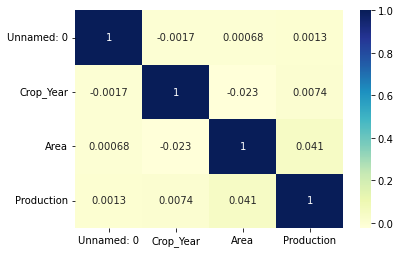

In [11]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [13]:
x=df['Area']
y=df['Production']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=111)

In [18]:
X_train

22943    90384.0
30934      600.0
40887    15107.0
19628        2.0
20896      100.0
          ...   
38407     2467.0
29218    14864.0
25625     3519.0
4895     14595.0
10349     2229.0
Name: Area, Length: 58184, dtype: float64

In [19]:
y_train

22943    175616.0
30934       300.0
40887     51090.0
19628         1.0
20896       100.0
           ...   
38407      3894.0
29218     11480.0
25625      1569.0
4895      16058.0
10349       972.0
Name: Production, Length: 58184, dtype: float64

In [20]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)

In [22]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const    433264.117596
Area         12.517891
dtype: float64

In [23]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     96.08
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.15e-22
Time:                        10:06:27   Log-Likelihood:            -1.0516e+06
No. Observations:               58184   AIC:                         2.103e+06
Df Residuals:                   58182   BIC:                         2.103e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.333e+05   7.26e+04      5.969      0.000    2.91e+05    5.76e+05
Area          12.5179      1.277      9.802      0.000      10.015      15.021
==============================================================================
Omnibus:                   168706.224   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8103931935.368
Skew:                          40.385   Prob(JB):                         0.00
Kurtosis:                    1829.533   Cond. No.                     5.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

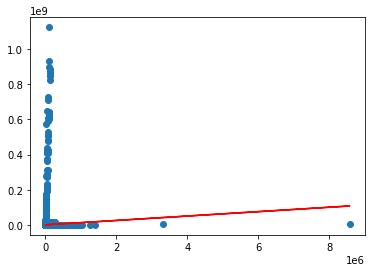

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train,4.333e+05+12.5179*X_train,'r')
plt.show()

In [25]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train - y_train_pred)

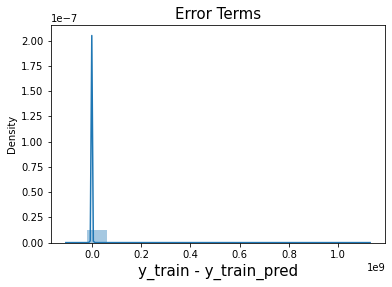

In [26]:
fig=plt.figure()
sns.distplot(res,bins=15)
plt.title('Error Terms',fontsize=15)
plt.xlabel('y_train - y_train_pred',fontsize=15)
plt.show()

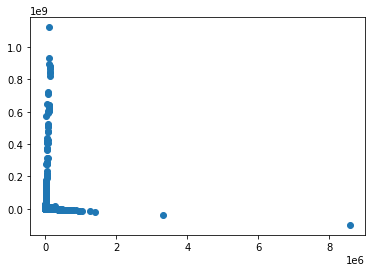

In [27]:
plt.scatter(X_train,res)
plt.show()

In [28]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
y_test_pred

8555     463307.055130
65858    433677.207987
13878    611205.933035
4248     435529.855801
69272    437482.646741
             ...      
52318    435141.801192
13737    451202.254882
34477    923965.430661
69865    455395.748246
68253    440499.458385
Length: 14547, dtype: float64

In [29]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_test_pred)
r_squared

0.0016957131314162543

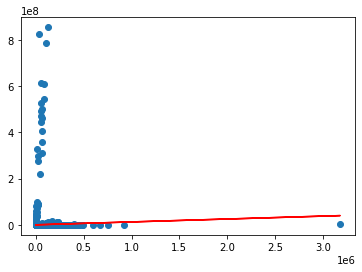

In [31]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=111)

In [34]:
X_train_lm.shape
X_train_lm=X_train_lm.values.reshape(-1,1)
X_test_lm=X_test_lm.values.reshape(-1,1)
print(X_train_lm.shape)
print(X_test_lm.shape)

(58184, 1)
(14547, 1)


In [35]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [36]:
print("Intercept :",lm.intercept_)
print("Slope :",lm.coef_)

Intercept : 433264.11759569094
Slope : [12.51789064]


In [37]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.0016486698798432453
0.0016957131314162543


In [39]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test,y_test_pred)
RMSE=math.sqrt(MSE)
print(RMSE)

18962432.767530125
